# Week 6 | Homework - 5
Joshua Hummell, Jiho Kim, Scott Reed

## Data load

The first thing we want to do is load the packages and data

We load the data using the [networkX example code](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()

### Now let's get some overview information on the graph

In [31]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 89\nAverage degree:   5.5625'

In [32]:
nx.density(G)

0.17943548387096775

In [33]:
nx.diameter(G)

4

In [34]:
nx.is_connected(G)

True

### Finally, let's take a look at the top 10 nodes

In [35]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[0:10]

[('E8', 14),
 ('E9', 12),
 ('E7', 10),
 ('Evelyn Jefferson', 8),
 ('Theresa Anderson', 8),
 ('Nora Fayette', 8),
 ('E5', 8),
 ('E6', 8),
 ('Laura Mandeville', 7),
 ('Brenda Rogers', 7)]

### It looks like most of the connections stem from E's, which are the events that occured. Let's dig into the women and their meetings. 

In [39]:
women = G.graph["top"]
clubs = G.graph["bottom"]

### 1. Project bipartite graph onto women nodes keeping number of co-occurence
### 2. The degree computed is weighted and counts the total number of shared contacts

In [44]:
W = bipartite.weighted_projected_graph(G, women)
print()
print("Number of Meetings | Member Name")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


Number of Meetings | Member Name
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


### Let's look at the number of people from the club as well as a which event it was, both with raw data as well as with weights

In [51]:
C = bipartite.weighted_projected_graph(G, clubs)
print("Raw Look")
print("Number of Members | Meeting Name")
def accessor(w):
    return C.degree(w)
clubs.sort(reverse=True, key=accessor)
for w in clubs:
    print(f"{accessor(w)} {w}")


Raw Look
Number of Members | Meeting Name
13 E8
13 E7
13 E9
13 E6
8 E5
8 E3
8 E12
8 E10
8 E4
8 E2
8 E1
8 E13
8 E14
8 E11


In [52]:
print("Weighted Look")    
print("Number of Members | Meeting Name")
def accessor(w):
    return C.degree(w, weight='weight')
clubs.sort(reverse=True, key=accessor)
for w in clubs:
    print(f"{accessor(w)} {w}")

Weighted Look
Number of Members | Meeting Name
59 E8
48 E7
46 E9
41 E6
38 E5
32 E3
28 E12
25 E10
23 E4
20 E2
19 E1
18 E13
18 E14
13 E11


In [65]:
### And finally, let's take a look at a Biadjacency matrix

In [62]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 9)	1
  (1, 10)	1
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 8)	1
  (2, 9)	1
  (3, 0)	1
  (3, 1)	1
  :	:
  (12, 1)	1
  (12, 2)	1
  (12, 6)	1
  (12, 7)	1
  (12, 11)	1
  (12, 12)	1
  (13, 1)	1
  (13, 2)	1
  (13, 3)	1
  (13, 6)	1
  (13, 7)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 0)	1
  (14, 1)	1
  (14, 6)	1
  (14, 7)	1
  (14, 13)	1
  (15, 0)	1
  (15, 2)	1
  (16, 2)	1
  (16, 13)	1
  (17, 2)	1
  (17, 13)	1


In [63]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs).todense())

Biadjacency matrix
[[1 0 1 1 1 1 0 0 1 1 1 0 0 0]
 [1 1 0 1 1 1 0 0 0 1 1 0 0 0]
 [1 1 1 1 1 1 0 0 1 1 0 0 0 0]
 [1 1 0 1 1 1 0 0 1 0 1 0 0 0]
 [0 1 0 0 1 1 0 0 1 0 0 0 0 0]
 [1 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 1 0 0 0 1 1 0]
 [1 1 1 0 0 0 1 1 0 0 0 1 1 0]
 [0 1 1 1 0 0 1 1 0 0 0 1 1 1]
 [1 1 0 0 0 0 1 1 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1]]


What we can infer thus far. There are certain women who attend events more than others. And the ones that are frequently in events are more likely to interact. We see that while E6-E9 are fully connected to every other event, E8 has the most weight of all connections. Were we to designate one meeting to spread vicious rumor during it would be e8.  

In [5]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
def accessor(w):
    return W.degree(w)
women.sort(reverse=True,key=accessor)
print("#Friends, Member")
for w in women:
    print(f"{accessor(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
def accessor(w):
    return W.degree(w, weight='weight')
women.sort(reverse=True,key=accessor)
sizes = {w:accessor(w)*10 for w in women}
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{accessor(w)} {w}")
def accessor(w):
    return C.degree(w, weight='weight')
sizes.update({w:accessor(w)*10 for w in clubs})



#Friends, Member
17 Evelyn Jefferson
17 Theresa Anderson
17 Ruth DeSand
17 Verne Sanderson
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Brenda Rogers
15 Frances Anderson
15 Eleanor Nye
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd

#Friend meetings, Member
57 Theresa Anderson
50 Evelyn Jefferson
46 Sylvia Avondale
46 Brenda Rogers
45 Laura Mandeville
43 Nora Fayette
40 Ruth DeSand
38 Verne Sanderson
37 Katherina Rogers
36 Eleanor Nye
34 Helen Lloyd
33 Myra Liddel
32 Frances Anderson
31 Pearl Oglethorpe
24 Dorothy Murchison
24 Charlotte McDowd
14 Olivia Carleton
14 Flora Price


Looking at women we see that a number are fully connected to every member (17) Theresa Anderson however has a far and away better connections. Should one want to reveal something and not have it spread across the entire world Flora Price or Olivia Carleton would seem to buy some time. 

Blue for Women | Red for Events


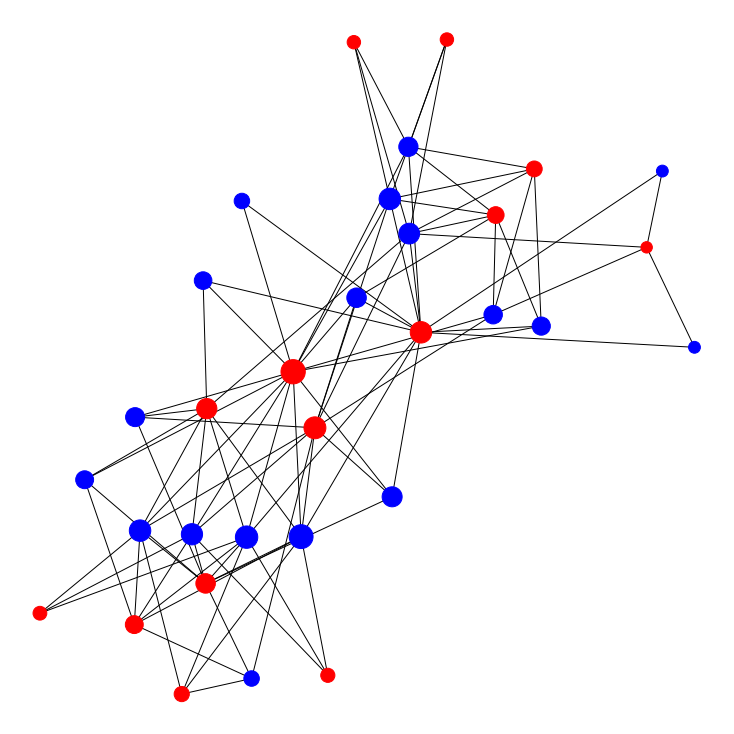

In [69]:
plt.figure(figsize=(10,10))
print("Blue for Women | Red for Events")
colors = ["blue" if i in women  else "red" for i in G.nodes]
nodesizes = [sizes[i] for i in G.nodes]
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos, with_labels=False, node_color=colors, node_size=nodesizes)
plt.show()